In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
s3fs is already the newest version (1.82-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!mkdir /content/s3

mkdir: cannot create directory ‘/content/s3’: File exists
s3fs: MOUNTPOINT directory /content/s3 is not empty. if you are sure this is safe, can use the 'nonempty' mount option.


In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics
import matplotlib.pyplot as plt

MIMIC Gender Validation on VinDr-PCXR Test Set

In [ ]:
test_df = pd.read_csv('/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/vinDR_peds_labels.csv')
test_df['Path'] = '/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/' + test_df['Path'].astype(str)

In [ ]:
mimic_gender_model = load_learner('/content/mimic_gender.pkl')
mimic_gender_model.dls.to(device='cuda')
mimic_gender_model.model.to(device='cuda')
gender_test_dl = mimic_gender_model.dls.test_dl(test_df)
gender_preds = mimic_gender_model.get_preds(dl=gender_test_dl, with_decoded=True)

In [ ]:
mimic_gender_model.dls.vocab.o2i

{'F': 0, 'M': 1}

In [ ]:
test_df.insert(len(test_df.columns), 'Gender_Tensor_Id', gender_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Gender_Probability', gender_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_gender_vindr_peds_test.csv')

                                                                                Path  \
0     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000295d6ff55184f19d99e95f93c3a55.jpg   
1     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0008e7acbcdf2fedd05cc236e5594074.jpg   
2     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000f60ed28579e82c402b99fcff67ef5.jpg   
3     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0018c771a8e8c20e6d7d5bc8e64181b4.jpg   
4     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/001c350dcc2ecc107afb19512f33b927.jpg   
...                                                                              ...   
9120  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/fef268e6a11bd1d8afd467637a9be995.jpg   
9121  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff3e527e8c2514dd7afff6ed0fddef4c.jpg   
9122  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff41e5847ab5cd928c2ade1c18bfa067.jpg   
9123  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff74cc4098b6a2ad94597078b211a69e.jpg   
9124  /content/vinDR_PCXR_Peds_C

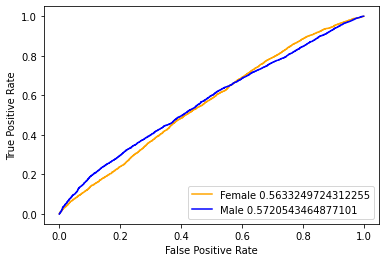

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = test_df['Sex'],y_score = [prob[0] for prob in test_df['Gender_Probability']], pos_label = 'F')
plt.plot(fpr,tpr, color='orange', label='Female ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = test_df['Sex'],y_score = [prob[1] for prob in test_df['Gender_Probability']], pos_label = 'M')
plt.plot(fpr,tpr, color='blue', label='Male ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

CheXpert Gender Validation on VinDr-PCXR Test Set

In [ ]:
test_df = pd.read_csv('/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/vinDR_peds_labels.csv')
test_df['Path'] = 'vinDR_PCXR_Peds_Chest_X-Ray_Data/' + test_df['Path'].astype(str)
chexpert_gender_model = load_learner('/content/chexpert_gender.pkl')
chexpert_gender_model.dls.to(device='cuda')
chexpert_gender_model.model.to(device='cuda')
gender_test_dl = chexpert_gender_model.dls.test_dl(test_df)
gender_preds = chexpert_gender_model.get_preds(dl=gender_test_dl, with_decoded=True)

In [ ]:
chexpert_gender_model.dls.vocab.o2i

{'F': 0, 'M': 1}

In [ ]:
test_df.insert(len(test_df.columns), 'Gender_Tensor_Id', gender_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Gender_Probability', gender_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_gender_vindr_peds_test.csv')

                                                                        Path  ...                            Gender_Probability
0      vinDR_PCXR_Peds_Chest_X-Ray_Data/000295d6ff55184f19d99e95f93c3a55.jpg  ...      [0.976163923740387, 0.02383607253432274]
1      vinDR_PCXR_Peds_Chest_X-Ray_Data/0008e7acbcdf2fedd05cc236e5594074.jpg  ...      [0.4909508526325226, 0.5090491771697998]
2      vinDR_PCXR_Peds_Chest_X-Ray_Data/000f60ed28579e82c402b99fcff67ef5.jpg  ...      [0.915467381477356, 0.08453260362148285]
3      vinDR_PCXR_Peds_Chest_X-Ray_Data/0018c771a8e8c20e6d7d5bc8e64181b4.jpg  ...    [0.9978001713752747, 0.002199789509177208]
4      vinDR_PCXR_Peds_Chest_X-Ray_Data/001c350dcc2ecc107afb19512f33b927.jpg  ...     [0.23498202860355377, 0.7650179862976074]
...                                                                      ...  ...                                           ...
16848  vinDR_PCXR_Peds_Chest_X-Ray_Data/fef268e6a11bd1d8afd467637a9be995.jpg  ...     [0.596190094947814

In [ ]:
test_df = pd.read_csv('/content/chexpert_gender_vindr_peds_test.csv')
test_df = test_df.drop_duplicates(subset=['Path'], keep='first')
test_df.to_csv('/content/sample_data/chexpert_gender_vindr_peds_test.csv')

In [ ]:
test_df = pd.read_csv('/content/chexpert_race2_vindr_peds_test.csv')
test_df = test_df.drop_duplicates(subset=['Path'], keep='first')
test_df.to_csv('/content/sample_data/chexpert_race2_vindr_peds_test.csv')

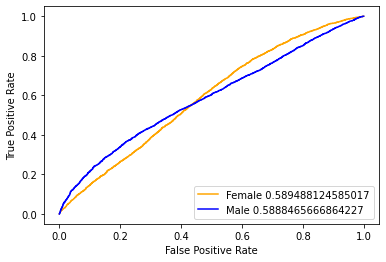

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = test_df['Sex'],y_score = [prob[0] for prob in test_df['Gender_Probability']], pos_label = 'F')
plt.plot(fpr,tpr, color='orange', label='Female ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = test_df['Sex'],y_score = [prob[1] for prob in test_df['Gender_Probability']], pos_label = 'M')
plt.plot(fpr,tpr, color='blue', label='Male ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

NIH Gender Validation on VinDr-PCXR Test Set

In [ ]:
test_df = pd.read_csv('/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/vinDR_peds_labels.csv')
test_df['Path'] = '/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/' + test_df['Path'].astype(str)
nih_gender_model = load_learner('/content/nih_gender.pkl')
nih_gender_model.dls.to(device='cuda')
nih_gender_model.model.to(device='cuda')
gender_test_dl = nih_gender_model.dls.test_dl(test_df, num_workers=10)
gender_preds = nih_gender_model.get_preds(dl=gender_test_dl, with_decoded=True)

In [ ]:
nih_gender_model.dls.vocab.o2i

{'F': 0, 'M': 1}

In [ ]:
test_df.insert(len(test_df.columns), 'Gender_Tensor_Id', gender_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Gender_Probability', gender_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/nih_gender_vindr_peds_test.csv')

                                                                                Path  \
0     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000295d6ff55184f19d99e95f93c3a55.jpg   
1     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0008e7acbcdf2fedd05cc236e5594074.jpg   
2     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000f60ed28579e82c402b99fcff67ef5.jpg   
3     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0018c771a8e8c20e6d7d5bc8e64181b4.jpg   
4     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/001c350dcc2ecc107afb19512f33b927.jpg   
...                                                                              ...   
9120  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/fef268e6a11bd1d8afd467637a9be995.jpg   
9121  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff3e527e8c2514dd7afff6ed0fddef4c.jpg   
9122  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff41e5847ab5cd928c2ade1c18bfa067.jpg   
9123  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff74cc4098b6a2ad94597078b211a69e.jpg   
9124  /content/vinDR_PCXR_Peds_C

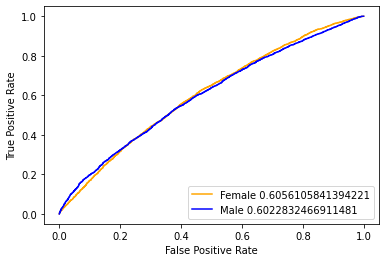

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = test_df['Sex'],y_score = [prob[0] for prob in test_df['Gender_Probability']], pos_label = 'F')
plt.plot(fpr,tpr, color='orange', label='Female ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = test_df['Sex'],y_score = [prob[1] for prob in test_df['Gender_Probability']], pos_label = 'M')
plt.plot(fpr,tpr, color='blue', label='Male ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()